In [6]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv(r"/content/drive/MyDrive/Final Project/Final Project/Dataset/heart.csv")

In [7]:
df.shape

(1025, 14)

In [8]:
# drop any row that contains a NaN value
df.dropna(inplace=True)


In [9]:
df.shape

(1025, 14)

In [14]:
column_values = df["cp"].unique()
print(column_values)

[0 1 2 3]


<Axes: xlabel='cp', ylabel='target'>

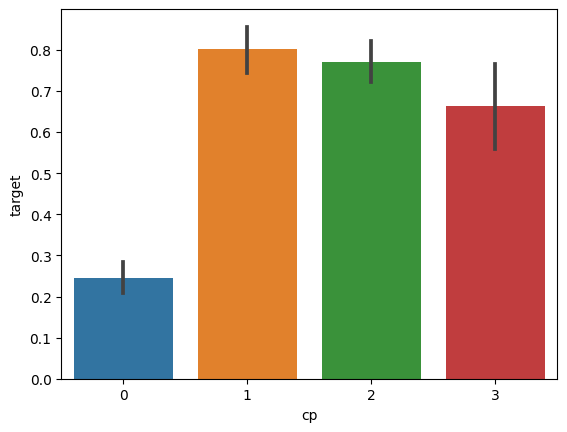

In [16]:
sns.barplot(x = 'cp', y = 'target', data = df)

<Axes: xlabel='sex', ylabel='target'>

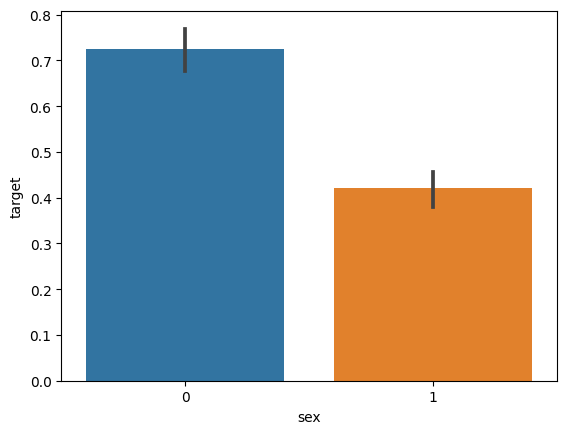

In [17]:
sns.barplot(x = 'sex', y = 'target', data = df)

In [19]:
from sklearn.model_selection import train_test_split
newdata=df.dropna(axis=0,how='any')
print(newdata.shape)
X = df.drop('target', axis=1)
Y = df['target']
Y1=list(Y)

Y=pd.DataFrame(Y)
print(X.shape)
print(Y.shape)
print(Y)
type(X)
type(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify = Y, random_state=1)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
print(X_train.mean(), X_test.mean(), X.mean())

(1025, 14)
(1025, 13)
(1025, 1)
      target
0          0
1          0
2          0
3          0
4          0
...      ...
1020       1
1021       0
1022       0
1023       1
1024       0

[1025 rows x 1 columns]
(717, 13) (308, 13) (717, 1) (308, 1)
age          54.334728
sex           0.670851
cp            0.921897
trestbps    131.690377
chol        246.640167
fbs           0.152022
restecg       0.545328
thalach     149.377964
exang         0.340307
oldpeak       1.071967
slope         1.386332
ca            0.754533
thal          2.327755
dtype: float64 age          54.665584
sex           0.753247
cp            0.990260
trestbps    131.428571
chol        244.509740
fbs           0.142857
restecg       0.493506
thalach     148.500000
exang         0.327922
oldpeak       1.070455
slope         1.383117
ca            0.753247
thal          2.314935
dtype: float64 age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs   

In [20]:
initial_number_of_data_points = len(X)


def get_unique(X_matrix, y_vector):
    Xy = list(set(list(zip([tuple(x) for x in X_matrix], y_vector))))
    X_matrix = [list(l[0]) for l in Xy]
    y_vector = [l[1] for l in Xy]
    return X_matrix, y_vector


X, Y = get_unique(X, Y)
data_points_removed = initial_number_of_data_points - len(X)
print("Number of duplicates removed:", data_points_removed )

Number of duplicates removed: 1024


In [26]:
# Random Forest Classifier
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import KFold, train_test_split

newdata = df.dropna(axis=0, how='any')
X = newdata.drop('target', axis=1)
Y = newdata['target']

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=1)

# Initialize a Random Forest classifier
rfclassifier = RandomForestClassifier()   #

# Fit the Random Forest classifier to your training data
rfclassifier.fit(X_train, np.ravel(Y_train))

# Make predictions on your test data
y_pred = rfclassifier.predict(X_test)

# Calculate various performance metrics
accuracy = accuracy_score(y_pred, Y_test)
precision=precision_score(y_pred,Y_test)
recall = recall_score(y_pred, Y_test)
f1 = 2 * (precision * recall) / (precision + recall)
cm = confusion_matrix(Y_test, y_pred)
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 0] / (cm[1, 0] + cm[1, 1])

# Print the performance metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}".format(f1))
print("Sensitivity: {:.2f}".format(sensitivity))
print("Specificity: {:.2f}".format(specificity))

# Initialize Bagging and Boosting classifiers using Logistic Regression as the base estimator
baggclassifier = BaggingClassifier(base_estimator=rfclassifier, n_estimators=300)
boostclassifier = AdaBoostClassifier(base_estimator=rfclassifier, algorithm="SAMME", n_estimators=300)

# Define a function to run k-fold cross-validation with a classifier
def run_kfold(clf):
    kf = KFold(n_splits=10, shuffle=False)
    outcomesaccuracy = []
    outcomesprecision = []
    outcomesrecall = []
    outcomesf1 = []
    fold = 0

    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        clf.fit(X_train, np.ravel(y_train))
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1 = 2 * (precision * recall) / (precision + recall)

        outcomesaccuracy.append(accuracy)
        outcomesprecision.append(precision)
        outcomesrecall.append(recall)
        outcomesf1.append(f1)

        print("Fold {0} accuracy: {1}".format(fold, accuracy))
        print("Fold {0} precision: {1}".format(fold, precision))
        print("Fold {0} recall: {1}".format(fold, recall))
        print("Fold {0} f1: {1}".format(fold, f1))

    mean_accuracy_outcome = np.mean(outcomesaccuracy)
    mean_precision_outcome = np.mean(outcomesprecision)
    mean_recall_outcome = np.mean(outcomesrecall)
    mean_f1_outcome = np.mean(outcomesf1)

    print("Mean Accuracy: {:.2f}".format(mean_accuracy_outcome * 100))
    print("Mean Precision: {:.2f}".format(mean_precision_outcome * 100))
    print("Mean Recall: {:.2f}".format(mean_recall_outcome * 100))
    print("Mean F1: {:.2f}".format(mean_f1_outcome))

# Run k-fold cross-validation with the boosting classifier
print("Running k-fold cross-validation with Boosting Classifier:")
run_kfold(boostclassifier)


Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 1.00
Sensitivity: 1.00
Specificity: 0.00
Running k-fold cross-validation with Boosting Classifier:
Fold 1 accuracy: 1.0
Fold 1 precision: 1.0
Fold 1 recall: 1.0
Fold 1 f1: 1.0
Fold 2 accuracy: 1.0
Fold 2 precision: 1.0
Fold 2 recall: 1.0
Fold 2 f1: 1.0
Fold 3 accuracy: 1.0
Fold 3 precision: 1.0
Fold 3 recall: 1.0
Fold 3 f1: 1.0
Fold 4 accuracy: 1.0
Fold 4 precision: 1.0
Fold 4 recall: 1.0
Fold 4 f1: 1.0
Fold 5 accuracy: 1.0
Fold 5 precision: 1.0
Fold 5 recall: 1.0
Fold 5 f1: 1.0
Fold 6 accuracy: 1.0
Fold 6 precision: 1.0
Fold 6 recall: 1.0
Fold 6 f1: 1.0
Fold 7 accuracy: 1.0
Fold 7 precision: 1.0
Fold 7 recall: 1.0
Fold 7 f1: 1.0
Fold 8 accuracy: 1.0
Fold 8 precision: 1.0
Fold 8 recall: 1.0
Fold 8 f1: 1.0
Fold 9 accuracy: 0.9705882352941176
Fold 9 precision: 0.9361702127659575
Fold 9 recall: 1.0
Fold 9 f1: 0.967032967032967
Fold 10 accuracy: 1.0
Fold 10 precision: 1.0
Fold 10 recall: 1.0
Fold 10 f1: 1.0
Mean Accuracy: 99.71

In [25]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
lcclassifier = LogisticRegression()
lcclassifier.fit(X_train, np.ravel(Y_train))
y_pred = lcclassifier.predict(X_test)
accuracy=accuracy_score(y_pred,Y_test)
precision=precision_score(y_pred,Y_test)
recall=recall_score(y_pred,Y_test)
f1=2*(precision*recall)/(precision+recall)
cm=confusion_matrix(Y_test,y_pred)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,0]/(cm[1,0]+cm[1,1])
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}".format(f1))
print("Sensitivity: {:.2f}".format(sensitivity))
print("Specificity: {:.2f}".format(specificity))

print("Bagging Classifier")
baggclassifier=BaggingClassifier(base_estimator=lcclassifier,n_estimators=300)
print("Boosting Classifier")
boostclassifier=AdaBoostClassifier(base_estimator=lcclassifier,algorithm="SAMME",n_estimators=300)
def run_kfold(clf):
    kf = KFold(10,shuffle=False)
    outcomesaccuracy = []
    outcomesprecision = []
    outcomesrecall = []
    outcomesf1 = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train, np.ravel(y_train))
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision=precision_score(y_test,predictions)
        recall=recall_score(y_test,predictions)
        f1=2*(precision*recall)/(precision+recall)
        cm=confusion_matrix(Y_test,y_pred)
        sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
        specificity=cm[1,0]/(cm[1,0]+cm[1,1])
        outcomesaccuracy.append(accuracy)
        outcomesprecision.append(precision)
        outcomesrecall.append(recall)
        outcomesf1.append(f1)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))
        print("Fold {0} precision: {1}".format(fold, precision))
        print("Fold {0} recall: {1}".format(fold, recall))
        print("Fold {0} f1: {1}".format(fold, f1))
        mean_accuracy_outcome = np.mean(outcomesaccuracy)
        mean_precision_outcome = np.mean(outcomesprecision)
        mean_recall_outcome = np.mean(outcomesrecall)
        mean_f1_outcome = np.mean(outcomesf1)
        print("Mean Accuracy: {0}".format(mean_accuracy_outcome))
        print("Mean Precision: {0}".format(mean_precision_outcome))
        print("Mean Recall: {0}".format(mean_recall_outcome))
        print("Mean F1: {0}".format(mean_f1_outcome))

run_kfold(boostclassifier)

Accuracy: 84.74%
Precision: 90.51%
Recall: 81.71%
F1 Score: 0.86
Sensitivity: 0.79
Specificity: 0.09
Bagging Classifier
Boosting Classifier
Fold 1 accuracy: 0.8640776699029126
Fold 1 precision: 0.8333333333333334
Fold 1 recall: 0.9
Fold 1 f1: 0.8653846153846153
Mean Accuracy: 0.8640776699029126
Mean Precision: 0.8333333333333334
Mean Recall: 0.9
Mean F1: 0.8653846153846153
Fold 2 accuracy: 0.8737864077669902
Fold 2 precision: 0.8888888888888888
Fold 2 recall: 0.8727272727272727
Fold 2 f1: 0.8807339449541284
Mean Accuracy: 0.8689320388349514
Mean Precision: 0.8611111111111112
Mean Recall: 0.8863636363636364
Mean F1: 0.8730592801693718
Fold 3 accuracy: 0.8543689320388349
Fold 3 precision: 0.8813559322033898
Fold 3 recall: 0.8666666666666667
Fold 3 f1: 0.8739495798319329
Mean Accuracy: 0.8640776699029126
Mean Precision: 0.8678593848085373
Mean Recall: 0.8797979797979799
Mean F1: 0.8733560467235589
Fold 4 accuracy: 0.8349514563106796
Fold 4 precision: 0.8461538461538461
Fold 4 recall: 0.83

In [27]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(X_train, np.ravel(Y_train))
y_pred = dtclassifier.predict(X_test)
accuracy=accuracy_score(y_pred,Y_test)
precision=precision_score(y_pred,Y_test)
recall=recall_score(y_pred,Y_test)
f1=2*(precision*recall)/(precision+recall)
cm=confusion_matrix(Y_test,y_pred)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,0]/(cm[1,0]+cm[1,1])
print(accuracy*100)
print(precision*100)
print(recall*100)
print(f1)
print(sensitivity)
print(specificity)
print("Bagging Classifier")
baggclassifier=BaggingClassifier(base_estimator=dtclassifier,n_estimators=300)
print("Boosting Classifier")
boostclassifier=AdaBoostClassifier(base_estimator=dtclassifier,algorithm="SAMME",n_estimators=150)
def run_kfold(clf):
    kf = KFold(10,shuffle=False)
    outcomesaccuracy = []
    outcomesprecision = []
    outcomesrecall = []
    outcomesf1 = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train, np.ravel(y_train))
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision=precision_score(y_test,predictions)
        recall=recall_score(y_test,predictions)
        f1=2*(precision*recall)/(precision+recall)
        cm=confusion_matrix(Y_test,y_pred)
        sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
        specificity=cm[1,0]/(cm[1,0]+cm[1,1])
        outcomesaccuracy.append(accuracy)
        outcomesprecision.append(precision)
        outcomesrecall.append(recall)
        outcomesf1.append(f1)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))
        print("Fold {0} precision: {1}".format(fold, precision))
        print("Fold {0} recall: {1}".format(fold, recall))
        print("Fold {0} f1: {1}".format(fold, f1))
        mean_accuracy_outcome = np.mean(outcomesaccuracy)
        mean_precision_outcome = np.mean(outcomesprecision)
        mean_recall_outcome = np.mean(outcomesrecall)
        mean_f1_outcome = np.mean(outcomesf1)
        print("Mean Accuracy: {0}".format(mean_accuracy_outcome))
        print("Mean Precision: {0}".format(mean_precision_outcome))
        print("Mean Recall: {0}".format(mean_recall_outcome))
        print("Mean F1: {0}".format(mean_f1_outcome))

run_kfold(boostclassifier)

100.0
100.0
100.0
1.0
1.0
0.0
Bagging Classifier
Boosting Classifier
Fold 1 accuracy: 1.0
Fold 1 precision: 1.0
Fold 1 recall: 1.0
Fold 1 f1: 1.0
Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1: 1.0
Fold 2 accuracy: 1.0
Fold 2 precision: 1.0
Fold 2 recall: 1.0
Fold 2 f1: 1.0
Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1: 1.0
Fold 3 accuracy: 1.0
Fold 3 precision: 1.0
Fold 3 recall: 1.0
Fold 3 f1: 1.0
Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1: 1.0
Fold 4 accuracy: 0.970873786407767
Fold 4 precision: 1.0
Fold 4 recall: 0.9433962264150944
Fold 4 f1: 0.970873786407767
Mean Accuracy: 0.9927184466019418
Mean Precision: 1.0
Mean Recall: 0.9858490566037736
Mean F1: 0.9927184466019418
Fold 5 accuracy: 0.970873786407767
Fold 5 precision: 1.0
Fold 5 recall: 0.9464285714285714
Fold 5 f1: 0.9724770642201834
Mean Accuracy: 0.9883495145631068
Mean Precision: 1.0
Mean Recall: 0.9779649595687332
Mean F1: 0.9886701701255902
Fold 6 accuracy: 1.0
Fol